In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [16]:
# Load the CSV files
red_wine_data = pd.read_csv('winequality-red.csv', sep=';', skiprows=1, names=["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"])
white_wine_data = pd.read_csv('winequality-white.csv', sep=';', skiprows=1, names=["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"])


In [17]:
# Convert the target column to numeric
red_wine_data['quality'] = pd.to_numeric(red_wine_data['quality'], errors='coerce')
white_wine_data['quality'] = pd.to_numeric(white_wine_data['quality'], errors='coerce')

In [18]:
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
white_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [22]:
#prepare the data
X_red = red_wine_data.drop('quality', axis=1)  
y_red = red_wine_data['quality']

X_white = white_wine_data.drop('quality', axis=1) 
y_white = white_wine_data['quality']

In [23]:
#split data into training and testing 
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red, y_red, test_size=0.2, random_state=42)
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white, y_white, test_size=0.2, random_state=42)

In [24]:
#model woo
model_red = LinearRegression()
model_red.fit(X_red_train, y_red_train)

model_white = LinearRegression()
model_white.fit(X_white_train, y_white_train)

LinearRegression()

In [34]:
#red wine statistics
y_red_pred = model_red.predict(X_red_test)
r2_red = r2_score(y_red_test, y_red_pred)
mse_red = mean_squared_error(y_red_test, y_red_pred)

#white wine statistics
y_white_pred = model_white.predict(X_white_test)
r2_white = r2_score(y_white_test, y_white_pred)
mse_white = mean_squared_error(y_white_test, y_white_pred)

print("The R Squared of the Red Wine Model is:", r2_red)
print("The Mean Square Error of the Red Wine Model is:", mse_red)

print("The R Sqaured of the White Wine Model is:", r2_white)
print("The Mean Square Error of the White Wine Model is:", mse_white)
print("")
print("The data above suggests that our model explains the red wine data much more accurately than the white wine data. We know this from our higher Rsquared value which means higher accuracy amongst our independent variables and our lower mean square error representing less difference between actual and predicted values.")


The R Squared of the Red Wine Model is: 0.403180341279623
The Mean Square Error of the Red Wine Model is: 0.3900251439639542
The R Sqaured of the White Wine Model is: 0.2652750042179167
The Mean Square Error of the White Wine Model is: 0.5690247717229245

The data above suggests that our model explains the red wine data much more accurately than the white wine data. We know this from our higher Rsquared value which means higher accuracy amongst our independent variables and our lower mean square error representing less difference between actual and predicted values.


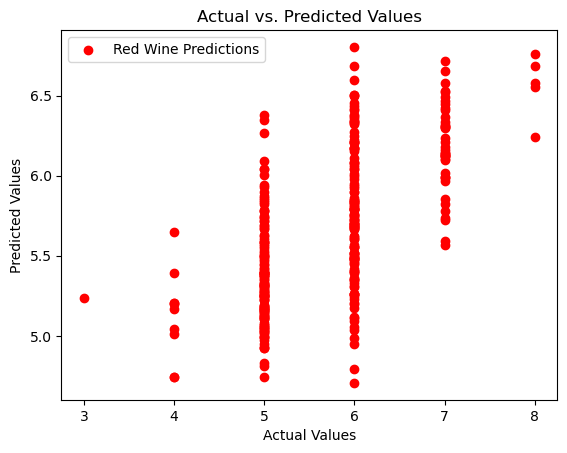

In [29]:
#show the white wine model 
plt.scatter(y_red_test, y_red_pred, color='red', label='Red Wine Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

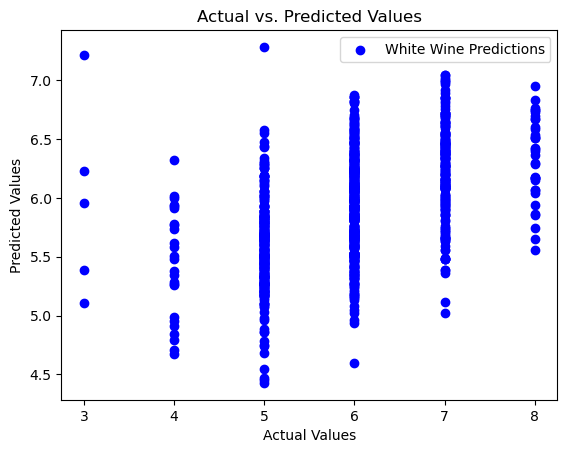

In [30]:
plt.scatter(y_white_test, y_white_pred, color='blue', label='White Wine Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()